# Star Catalog Tests

Testing the star catalog from 2.1i dr1b offline. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
star_file = h5py.File('star_catalog.hdf5')

In [5]:
for group in star_file:
    print(group)

provenance
stars


In [6]:
for member in star_file['stars']:
    print(member)

dec
g_mag
i_mag
id
measured_T
measured_e1
measured_e2
model_T
model_e1
model_e2
r_mag
ra
u_mag
y_mag
z_mag


In [7]:
star_data = {}
for member in star_file['stars']:
    star_data[member] = star_file['stars/'+member].value

/Users/Emily/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [8]:
star_data = pd.DataFrame(star_data)

In [9]:
star_data.head()

,dec,g_mag,i_mag,id,measured_T,measured_e1,measured_e2,model_T,model_e1,model_e2,r_mag,ra,u_mag,y_mag,z_mag
0,-44.628393,NaN,NaN,11980854221865093,13.061538,-0.007305,-0.010055,13.019646,-0.011853,-0.014217,NaN,51.690682,NaN,17.587492,NaN
1,-44.636088,NaN,19.834123,11981129099771905,5.171759,-0.005592,0.007811,5.306920,-0.015357,-0.001070,NaN,51.153827,NaN,NaN,NaN
2,-44.635844,NaN,NaN,11985114829422654,6.755043,-0.012714,0.039872,6.574878,-0.021348,0.033777,20.979049,54.185420,NaN,NaN,NaN
3,-44.639516,NaN,NaN,11989787753840924,8.827509,0.006301,0.016999,8.813405,0.005378,0.013389,NaN,55.597521,18.170237,NaN,NaN
4,-44.631493,NaN,NaN,11994185800351925,14.573617,-0.004924,-0.013318,14.711463,-0.001157,-0.014390,NaN,57.784368,NaN,17.429062,NaN


In [11]:
star_data['e1_res'] = star_data['measured_e1'] - star_data['model_e1']
star_data['e2_res'] = star_data['measured_e2'] - star_data['model_e2']
star_data['e1_frac'] = star_data['e1_res']/star_data['measured_e1']
star_data['e2_frac'] = star_data['e2_res']/star_data['measured_e2']
star_data['T_res'] = star_data['measured_T']-star_data['model_T']
star_data['T_frac'] = star_data['T_res']/star_data['measured_T']

/Users/Emily/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Emily/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


mean 0.0028935551829359506
std 0.0028935551829359506


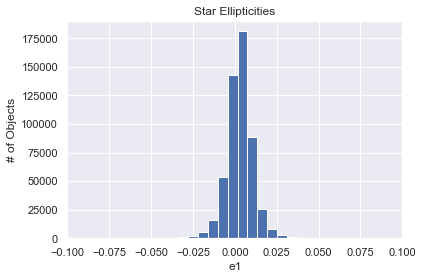

In [12]:
plt.hist(star_data['measured_e1'],bins=100)
plt.xlim(-0.1,0.1)
print('mean',np.mean(star_data['measured_e1']))
print('std',np.mean(star_data['measured_e1']))
plt.title('Star Ellipticities')
plt.xlabel('e1')
plt.ylabel('# of Objects')
plt.show()

mean -0.00038549302381713966
std -0.00038549302381713966


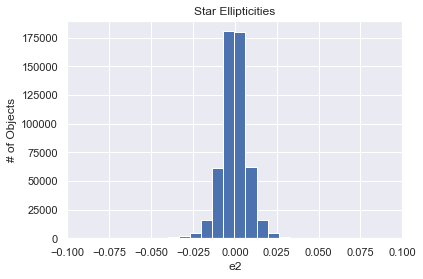

In [13]:
plt.hist(star_data['measured_e2'],bins=100)
plt.xlim(-0.1,0.1)
print('mean',np.mean(star_data['measured_e2']))
print('std',np.mean(star_data['measured_e2']))
plt.title('Star Ellipticities')
plt.xlabel('e2')
plt.ylabel('# of Objects')
plt.show()

In [17]:
# Unusually round stars? see the values from HSC Software pipeline figure  

mean 0.0028935551829359506
std 0.0028935551829359506


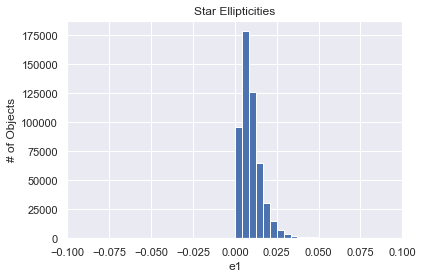

In [16]:
e = np.sqrt(star_data['measured_e1']**2+star_data['measured_e2']**2)
plt.hist(e,bins=100)
plt.xlim(-0.1,0.1)
print('mean',np.mean(star_data['measured_e1']))
print('std',np.mean(star_data['measured_e1']))
plt.title('Star Ellipticities')
plt.xlabel('e1')
plt.ylabel('# of Objects')
plt.show()

mean 0.002893971732746721
std 0.002893971732746721


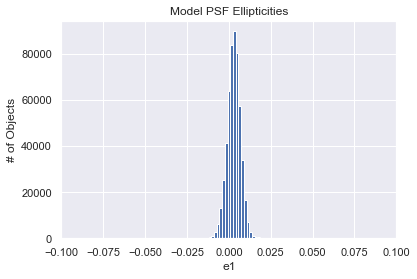

In [75]:
plt.hist(star_data['model_e1'],bins=100)
plt.xlim(-0.1,0.1)
print('mean',np.mean(star_data['model_e1']))
print('std',np.mean(star_data['model_e1']))
plt.title('Model PSF Ellipticities')
plt.xlabel('e1')
plt.ylabel('# of Objects')
plt.show()

In [18]:
# The unscaled residuals seem good, see figure 7 of first yeae HSC SSP survey paper 

mean -4.217358285882325e-07
std -4.217358285882325e-07


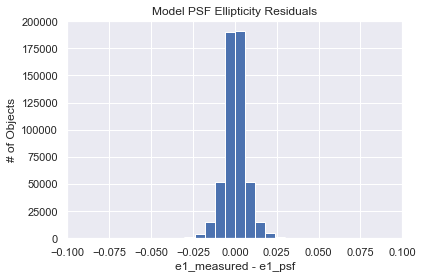

In [79]:
plt.hist(star_data['measured_e1']-star_data['model_e1'],bins=100)
print('mean',np.mean(star_data['measured_e1']-star_data['model_e1']))
print('std',np.mean(star_data['measured_e1']-star_data['model_e1']))
plt.xlim(-0.1,0.1)
plt.title('Model PSF Ellipticity Residuals')
plt.xlabel('e1_measured - e1_psf')
plt.ylabel('# of Objects')
plt.show()

mean -2.3544855960252303e-05
std -2.3544855960252303e-05


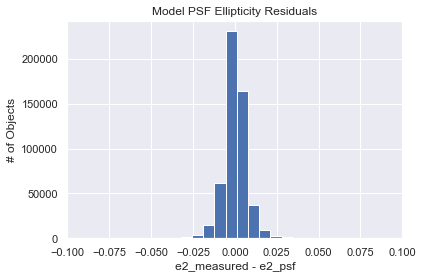

In [19]:
plt.hist(star_data['measured_e2']-star_data['model_e2'],bins=100)
print('mean',np.mean(star_data['measured_e2']-star_data['model_e2']))
print('std',np.mean(star_data['measured_e2']-star_data['model_e2']))
plt.xlim(-0.1,0.1)
plt.title('Model PSF Ellipticity Residuals')
plt.xlabel('e2_measured - e2_psf')
plt.ylabel('# of Objects')
plt.show()

In [21]:
# But the fractional psf residuals seem way too high, see HSC software pipeline paper figure 8

mean 2.2546400818721386
std 2.2546400818721386


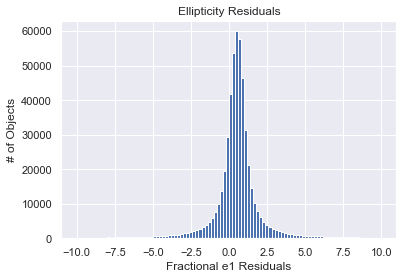

In [23]:
plt.hist(star_data['e1_frac'],bins=100,range=(-10,10))
print('mean',np.mean(star_data['e1_frac']))
print('std',np.mean(star_data['e1_frac']))
plt.title('Ellipticity Residuals')
plt.xlabel('Fractional e1 Residuals')
plt.ylabel('# of Objects')
plt.show()

mean 1.7910153478265247
std 1.7910153478265247


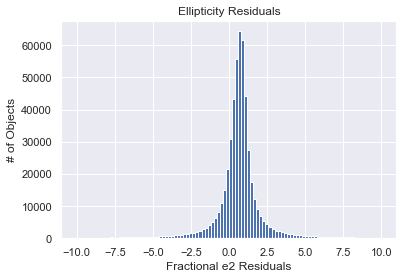

In [24]:
plt.hist(star_data['e2_frac'],bins=100,range=(-10,10))
print('mean',np.mean(star_data['e2_frac']))
print('std',np.mean(star_data['e2_frac']))
plt.title('Ellipticity Residuals')
plt.xlabel('Fractional e2 Residuals')
plt.ylabel('# of Objects')
plt.show()

In [27]:
# The size residuals seem correct, see the same figure as above or from the year one shear paper figure 6

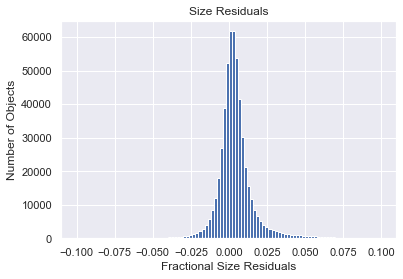

In [26]:
plt.hist(star_data['T_frac'],bins=100,range=(-.1,.1))
plt.title('Size Residuals')
plt.xlabel('Fractional Size Residuals')
plt.ylabel('Number of Objects')
plt.show()

In [28]:
# More tests of the PSF/measured ellipticities

Text(0, 0.5, 'Model e1')

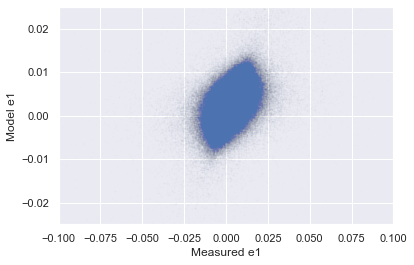

In [29]:
plt.scatter(star_data['measured_e1'],star_data['model_e1'],alpha=0.02,s=0.2)
plt.xlim(-0.1,0.1)
plt.ylim(-0.025,0.025)
plt.xlabel('Measured e1')
plt.ylabel('Model e1')

Text(0, 0.5, 'Model e1')

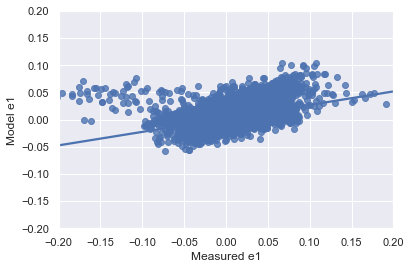

In [166]:
sns.regplot(star_data['measured_e1'],star_data['model_e1'])
plt.xlim(-0.2,0.2)
plt.ylim(-0.2,0.2)
plt.xlabel('Measured e1')
plt.ylabel('Model e1')

Text(0, 0.5, 'Model e2')

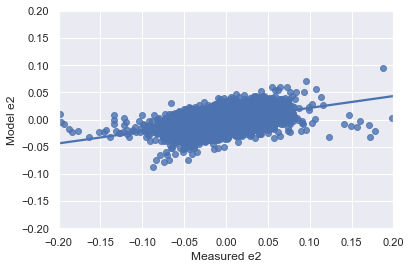

In [167]:
sns.regplot(star_data['measured_e2'],star_data['model_e2'])
plt.xlim(-0.2,0.2)
plt.ylim(-0.2,0.2)
plt.xlabel('Measured e2')
plt.ylabel('Model e2')

20.59873087274464
0.8217558186784828


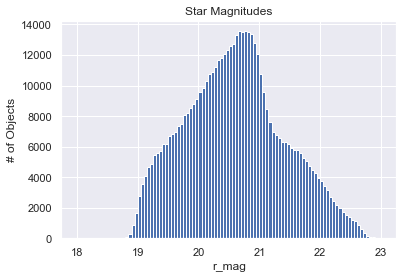

In [63]:
plt.hist(star_data['r_mag'],bins=100,range=(18,23))
print(np.mean(star_data['r_mag']))
print(np.std(star_data['r_mag']))
plt.xlabel('r_mag')
plt.ylabel('# of Objects')
plt.title('Star Magnitudes')
plt.show()

Text(0.5, 1.0, 'Stars')

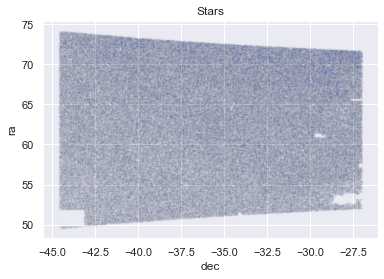

In [66]:
plt.scatter(star_data['dec'],star_data['ra'],alpha=0.02,s=0.2)
plt.xlabel('dec')
plt.ylabel('ra')
plt.title('Stars')

(18.5, 22.5)

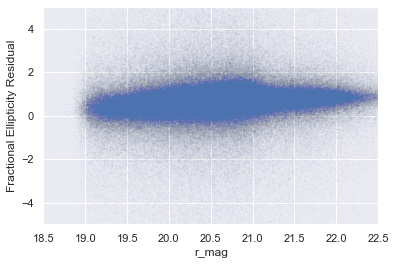

In [30]:
plt.scatter(star_data['r_mag'],star_data['e2_frac'],alpha=0.02,s=0.2)
plt.ylabel('Fractional Ellipticity Residual')
plt.xlabel('r_mag')
plt.ylim(-5,5)
plt.xlim(18.5,22.5)

(18.5, 22.5)

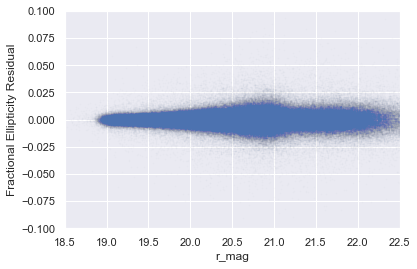

In [32]:
plt.scatter(star_data['r_mag'],star_data['e2_res'],alpha=0.02,s=0.2)
plt.ylabel('Fractional Ellipticity Residual')
plt.xlabel('r_mag')
plt.ylim(-.1,.1)
plt.xlim(18.5,22.5)

(18.5, 22.5)

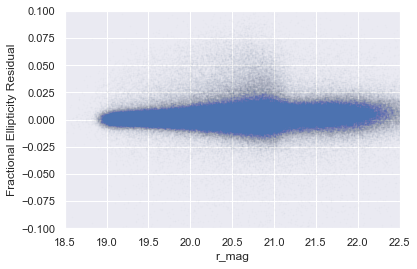

In [34]:
plt.scatter(star_data['r_mag'],star_data['T_frac'],alpha=0.02,s=0.2)
plt.ylabel('Fractional Ellipticity Residual')
plt.xlabel('r_mag')
plt.ylim(-.1,.1)
plt.xlim(18.5,22.5)

Text(0.5, 0, 'e2')

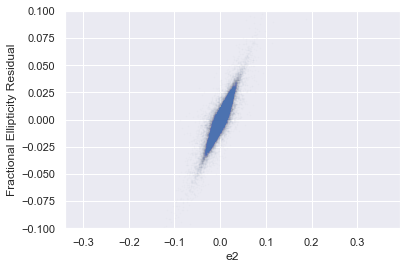

In [138]:
plt.scatter(e2,de2,alpha=0.02,s=0.2)
plt.ylim(-0.1,0.1)
plt.ylabel('Fractional Ellipticity Residual')
plt.xlabel('e2')

Text(0.5, 0, 'e2')

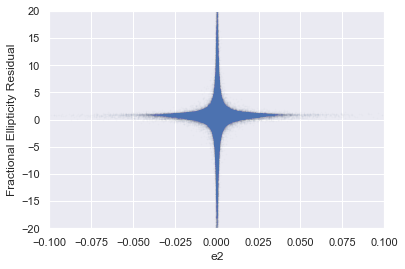

In [143]:
plt.scatter(e2,e2_frac,alpha=0.02,s=0.2)
plt.xlim(-0.1,0.1)
plt.ylim(-20,20)
plt.ylabel('Fractional Ellipticity Residual')
plt.xlabel('e2')

In [43]:
band = 'r'
mag = star_data[band+'_mag'].values
mmin = 18
mmax = 24
nbin = 20
edges = np.linspace(mmin, mmax, nbin+1)
index = np.digitize(mag, edges)
dT = np.zeros(nbin)
errT = np.zeros(nbin)
e1_binned = np.zeros(nbin)
e2_binned = np.zeros(nbin)
err1 = np.zeros(nbin)
err2 = np.zeros(nbin)
m = np.zeros(nbin)


for i in range(nbin):
    w = np.where((index==i+1) & np.isfinite(star_data['T_res']) & np.isfinite(star_data['e1_res']) & np.isfinite(star_data['e2_res']) )
    m[i] = mag[w].mean()
    dT_i = star_data['T_res'].values[w]
    e1_i = star_data['e1_res'].values[w]
    e2_i = star_data['e2_res'].values[w]
    dT[i] = dT_i.mean()
    errT[i] = dT_i.std() / np.sqrt(dT_i.size)
    e1_binned[i] = e1_i.mean()
    err1[i] = e1_i.std() / np.sqrt(e1_i.size)
    e2_binned[i] = e2_i.mean()
    err2[i] = e2_i.std() / np.sqrt(e2_i.size)

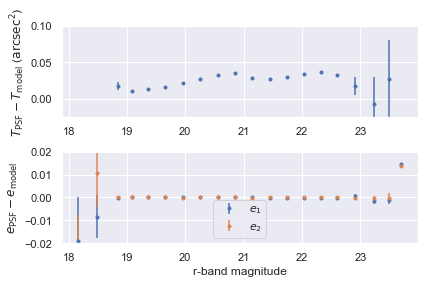

In [45]:
band = 'r'
ax = plt.subplot(2,1,1)
plt.errorbar(m, dT, errT, fmt='.')
plt.ylabel(r"$T_\mathrm{PSF} - T_\mathrm{model}$ ($\mathrm{arcsec}^2$)")
plt.ylim(-0.025, 0.1)
plt.subplot(2,1,2, sharex=ax)
plt.errorbar(m, e1_binned, err1, label='$e_1$', fmt='.')
plt.errorbar(m, e2_binned, err2, label='$e_2$', fmt='.')
plt.ylabel(r"$e_\mathrm{PSF} - e_\mathrm{model}$")
plt.xlabel(f"{band}-band magnitude")
plt.ylim(-0.02, 0.02)
plt.legend()
plt.tight_layout()

In [46]:
band = 'r'
mag = star_data[band+'_mag'].values
mmin = 18
mmax = 24
nbin = 20
edges = np.linspace(mmin, mmax, nbin+1)
index = np.digitize(mag, edges)
dT = np.zeros(nbin)
errT = np.zeros(nbin)
e1_binned = np.zeros(nbin)
e2_binned = np.zeros(nbin)
err1 = np.zeros(nbin)
err2 = np.zeros(nbin)
m = np.zeros(nbin)


for i in range(nbin):
    w = np.where((index==i+1) & np.isfinite(star_data['T_frac']) & np.isfinite(star_data['e1_frac']) & np.isfinite(star_data['e2_frac']) )
    m[i] = mag[w].mean()
    dT_i = star_data['T_frac'].values[w]
    e1_i = star_data['e1_frac'].values[w]
    e2_i = star_data['e2_frac'].values[w]
    dT[i] = dT_i.mean()
    errT[i] = dT_i.std() / np.sqrt(dT_i.size)
    e1_binned[i] = e1_i.mean()
    err1[i] = e1_i.std() / np.sqrt(e1_i.size)
    e2_binned[i] = e2_i.mean()
    err2[i] = e2_i.std() / np.sqrt(e2_i.size)

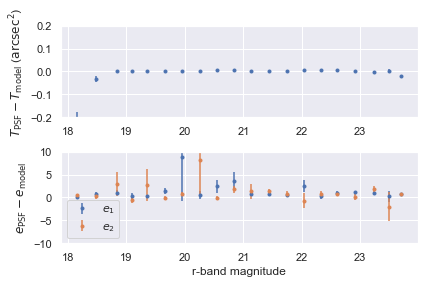

In [48]:
band = 'r'
ax = plt.subplot(2,1,1)
plt.errorbar(m, dT, errT, fmt='.')
plt.ylabel(r"$T_\mathrm{PSF} - T_\mathrm{model}$ ($\mathrm{arcsec}^2$)")
plt.ylim(-0.2, 0.2)
plt.subplot(2,1,2, sharex=ax)
plt.errorbar(m, e1_binned, err1, label='$e_1$', fmt='.')
plt.errorbar(m, e2_binned, err2, label='$e_2$', fmt='.')
plt.ylabel(r"$e_\mathrm{PSF} - e_\mathrm{model}$")
plt.xlabel(f"{band}-band magnitude")
plt.ylim(-10, 10)
plt.legend()
plt.tight_layout()